In [1]:
import pandas as pd
df = pd.read_csv("tcs_only_modeling_abt.tsv", sep='\t')
data = df.drop(["uid", "tech_obs_id", "app_bank_nm", "tech_dog_type", "trg_utilization", "tech_target_source", "tech_target_d"],
               axis = 1)
data = data.drop(['var_0{}'.format(i) for i in range(63, 73 + 1)], axis = 1)
data = data.dropna()
data = pd.get_dummies(data)
y1 = data['trg_pd']
y2 = data['trg_grace']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data = data.drop(columns=['trg_pd', 'trg_grace'])

In [2]:
data.head()

,var_001,var_002,var_003,var_004,var_005,var_006,var_007,var_008,var_009,var_010,...,var_062_mts,var_062_orient,var_062_pochta,var_062_renaissance,var_062_rosbank,var_062_sbrf,var_062_tinkoff,var_062_ubrr,var_062_uralsib,var_062_vtb24
0,-0.167919,0.673893,-0.767992,-0.073527,1.374671,-0.070758,-0.480494,-0.125601,0.655862,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,0.655344,-0.087093,-0.087736,-0.141723,-0.360996
1,-0.167919,0.673893,-0.767992,-0.073527,-0.727447,-0.070758,-0.480494,-0.125601,0.655862,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,0.655344,-0.087093,-0.087736,-0.141723,-0.360996
2,-0.167919,0.673893,-0.767992,-0.073527,-0.727447,-0.070758,-0.480494,-0.125601,0.655862,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,0.655344,-0.087093,-0.087736,-0.141723,-0.360996
3,-0.167919,0.673893,-0.767992,-0.073527,1.374671,-0.070758,-0.480494,-0.125601,0.655862,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,-1.525916,-0.087093,-0.087736,-0.141723,2.770113
4,-0.167919,-1.483916,-0.767992,-0.073527,-0.727447,-0.070758,-0.480494,-0.125601,-1.524711,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,0.655344,-0.087093,-0.087736,-0.141723,-0.360996


In [3]:
data.shape

(63230, 471)

In [4]:
import torch

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y2, test_size=0.3, stratify=y2)

In [7]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [8]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [9]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [10]:
import numpy

In [11]:
X_train = X_train.float()
X_test = X_test.float()

In [18]:
class EncoderNet(torch.nn.Module):
    def __init__(self):
        super(EncoderNet, self).__init__()
        self.bn0 = torch.nn.BatchNorm1d(471)
        self.fc1 = torch.nn.Linear(471, 235)
        self.ac1 = torch.nn.ReLU()
        self.bn1 = torch.nn.BatchNorm1d(235)
        self.fc2 = torch.nn.Linear(235, 117)
        self.ac2 = torch.nn.ReLU()
        self.bn2 = torch.nn.BatchNorm1d(117)
        self.fc3 = torch.nn.Linear(117, 60)
        self.ac3 = torch.nn.ReLU()
        self.bn3 = torch.nn.BatchNorm1d(60)
        self.fc4 = torch.nn.Linear(60, 117)
        self.ac4 = torch.nn.ReLU()
        self.bn4 = torch.nn.BatchNorm1d(117)
        self.fc5 = torch.nn.Linear(117, 235)
        self.ac5 = torch.nn.ReLU()
        self.bn5 = torch.nn.BatchNorm1d(235)
        self.fc6 = torch.nn.Linear(235, 471)
        
    def forward(self, x):
        x = self.bn0(x)
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.bn2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.bn3(x)
        x = self.fc4(x)
        x = self.ac4(x)
        x = self.bn4(x)
        x = self.fc5(x)
        x = self.ac5(x)
        x = self.bn5(x)
        x = self.fc6(x)
        return x
        
    def encode(self, x):
        x = self.bn0(x)
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.bn2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.bn3(x)
        return x
    
    def decode(self, x):
        x = self.fc4(x)
        x = self.ac4(x)
        x = self.bn4(x)
        x = self.fc5(x)
        x = self.ac5(x)
        x = self.bn5(x)
        x = self.fc6(x)
        return x

In [19]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = EncoderNet()
net = net.to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=3.0e-4)

In [20]:
batch_size = 100
loss_history = []
loss = torch.nn.MSELoss()

for epoch in range(1000):
    order = numpy.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        X_batch = X_train[order[start_index : start_index + batch_size]]
        preds = net.forward(X_batch)
        loss_val = loss(preds, X_batch)
        loss_val.backward()
        optimizer.step()

    test_pred = net.forward(X_test)
    loss_history.append((loss(test_pred, X_test).data))
    print(loss_history[-1])

tensor(0.6699)
tensor(0.6074)
tensor(0.5740)
tensor(0.5509)


KeyboardInterrupt: 

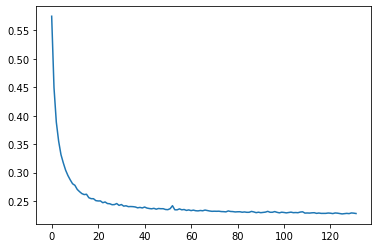

In [168]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(loss_history)

In [169]:
torch.save(net, 'encoder.pickle')

C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type EncoderNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [170]:
X_train_en = net.encode(X_train).data

In [171]:
X_test_en = net.encode(X_test).data

In [172]:
X_train_en = X_train_en.numpy()
X_test_en = X_test_en.numpy()

In [173]:
y_train = y_train.numpy()
y_test = y_test.numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [174]:
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [175]:
tuned_parameters = {'alpha': [10 ** a for a in range(-6, -1)]}
clf = GridSearchCV(SGDClassifier(loss='log', penalty='l2')
                  ,tuned_parameters, cv=9, scoring='roc_auc').fit(X_train_en, y_train)

In [176]:
clf.score(X_test_en, y_test)

0.6285241903510304

In [177]:
y_pred = clf.predict(X_test_en)

In [178]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.01      0.01      6095
           1       0.68      1.00      0.81     12874

    accuracy                           0.68     18969
   macro avg       0.61      0.50      0.41     18969
weighted avg       0.64      0.68      0.55     18969

0.5020429217213905
